### 0. 환경설정

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

# 시각화 관련
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from collections import Counter
from PIL import Image
from matplotlib import rc

In [3]:
# 그래프에서 한글 폰트 깨지는 문제에 대한 대처(전역 글꼴 설정)
import matplotlib.font_manager as fm
import warnings
warnings.filterwarnings(action='ignore') 
'''
path = 'C:/Windows/Fonts/NanumSquareR.ttf' # '/usr/share/fonts/truetype/nanum/NanumGothic.ttf'
font_name = fm.FontProperties(fname=path).get_name() # 기본 폰트 사이즈 : 10


plt.rc('font', family=font_name)
#fm._rebuild()
'''

"\npath = 'C:/Windows/Fonts/NanumSquareR.ttf' # '/usr/share/fonts/truetype/nanum/NanumGothic.ttf'\nfont_name = fm.FontProperties(fname=path).get_name() # 기본 폰트 사이즈 : 10\n\n\nplt.rc('font', family=font_name)\n#fm._rebuild()\n"

In [19]:
import matplotlib
matplotlib.rcParams['font.family'] ='Malgun Gothic'
matplotlib.rcParams['axes.unicode_minus'] =False

## 1. Safety_안전성

### 1-1. 제외

In [ ]:
#지표선정에서 제외
#해당 데이터도 d1에 다 들어있긴하지만 "시간대"가 있다는 것이 다름
#후에 지역선정까지 끝났을때 차없는 거리 시행 시간대까지 추천할 것이라면 사용할 것!
d4 = pd.read_csv('시간대별+교통사고+현황_20221021121726.csv')#,encoding='cp949')
d4 = d4['시간대별\t시점\t자치구별\t발생건수\t사망자수\t부상자수'].str.split('\t',expand = True)
d4.columns = ['시간대별','시점','자치구','발생건수','사망자수','부상자수']
d4.head()

,시간대별,시점,자치구,발생건수,사망자수,부상자수
0,소계,2021,소계,33913,243,45223
1,소계,2021,종로구,778,6,1050
2,소계,2021,중구,854,3,1156
3,소계,2021,용산구,1014,5,1369
4,소계,2021,성동구,1057,8,1362


In [ ]:
#100에 가까울수록 안전
d2 = pd.read_csv('교통안전지수_20221021121453.csv')# encoding='cp949')
d2.head()

,자치구별(1),자치구별(2),2020
0,서울시,소계,78.38
1,서울시,종로구,79.78
2,서울시,중구,75.20
3,서울시,용산구,79.97
4,서울시,성동구,78.71


In [ ]:
#지표선정에서 제외
#d1에 전부 들어있음
d3 = pd.read_csv('보행자+사고현황_20221021154230.csv',encoding='cp949')
d3 = d3['시점\t현황별(2)\t자치구별(2)\t사망자수\t부상자수'].str.split('\t',expand = True)
d3.columns = ['시점','현황','자치구','사망자수(명)','부상자수(명)']
d3.head()

,시점,현황,자치구,사망자수(명),부상자수(명)
0,2021,소계,소계,124,7236
1,2021,소계,종로구,4,179
2,2021,소계,중구,2,173
3,2021,소계,용산구,2,179
4,2021,소계,성동구,5,244


### 1-2. 안전성_지표

In [20]:
d1 = pd.read_csv('data/교통사고+현황(구별)_20221021121851.csv', encoding='cp949')
d1 = d1['시점\t자치구별(2)\t발생건수 (건)\t자동차 1만대당 발생건수 (건)\t사망자수 (명)\t인구 10만명당 사망자수 (명)\t부상자수 (명)\t인구 10만명당 부상자수 (명)'].str.split('\t',expand = True)
d1.columns = ['year','Gu','num','car10000_num','dead','dead_per100000','injured','injured_per100000']
d1 = d1.astype({'num':'float'})
d1 = d1.astype({'car10000_num':'float'})
d1 = d1.astype({'dead':'float'})
d1 = d1.astype({'dead_per100000':'float'})
d1 = d1.astype({'injured':'float'})
d1 = d1.astype({'injured_per100000':'float'})
d1.head()


,year,Gu,num,car10000_num,dead,dead_per100000,injured,injured_per100000
0,2021,종로구,778.0,122.6,6.0,3.9,1050.0,682.8
1,2021,중구,854.0,113.3,3.0,2.3,1156.0,877.2
2,2021,용산구,1014.0,105.1,5.0,2.1,1369.0,576.9
3,2021,성동구,1057.0,84.6,8.0,2.7,1362.0,465.4
4,2021,광진구,922.0,78.7,4.0,1.1,1216.0,344.8


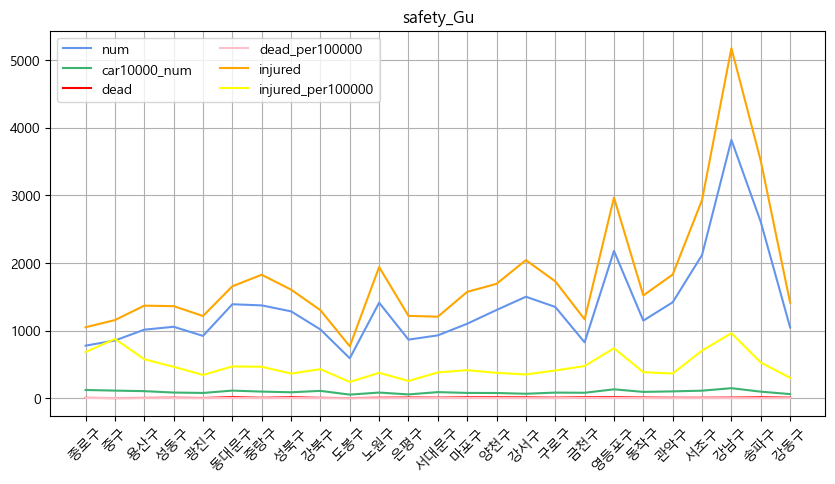

In [21]:
#100점 만점
a = d1
plt.figure(figsize=(10, 5))
plt.plot(a["Gu"],a["num"], color='cornflowerblue',label = "num")
plt.plot(a["Gu"],a["car10000_num"], color='mediumseagreen',label = "car10000_num")
plt.plot(a["Gu"],a["dead"], color='red',label = "dead")
plt.plot(a["Gu"],a["dead_per100000"], color='pink',label = "dead_per100000")
plt.plot(a["Gu"],a["injured"], color='orange',label = "injured")
plt.plot(a["Gu"],a["injured_per100000"], color='yellow',label = "injured_per100000")
plt.grid(True)
plt.xticks(rotation=45)
plt.legend(loc='best', ncol=2)
plt.title("safety_Gu")

plt.show()


In [44]:
from sklearn.preprocessing import MinMaxScaler
min_max_scaler = MinMaxScaler()
fitted = min_max_scaler.fit(d1.drop(['year','Gu'],axis = 1))
d1_scale = min_max_scaler.transform(d1.drop(['year','Gu'],axis = 1))
d1_scale = pd.DataFrame(d1_scale, columns=(d1.drop(['year','Gu'],axis = 1)).columns, index=list(d1.drop(['year','Gu'],axis = 1).index.values))
d1_scale.head()

,num,car10000_num,dead,dead_per100000,injured,injured_per100000
0,0.057913,0.721053,0.214286,0.535714,0.063989,0.612774
1,0.081449,0.623158,0.000000,0.250000,0.088042,0.882100
2,0.131000,0.536842,0.142857,0.214286,0.136374,0.466057
3,0.144317,0.321053,0.357143,0.321429,0.134786,0.311582
4,0.102509,0.258947,0.071429,0.035714,0.101656,0.144500


In [47]:
d1_scale['safety'] = (0.2*d1_scale['num'] +0.3* d1_scale['car10000_num'] + 
                      0.2*(d1_scale['dead_per100000']+ d1_scale['injured_per100000'])+
                      0.3*(d1_scale['dead'] + d1_scale['injured']))

*  0.3*[사망자수 + 부상자수]+0.2*[10만명당사망자수 + 10만명당부상자수]+0.2*[발생건수]+0.3*[10만대당 발생건수]
* 인명피해0.5, 교통사고0.5
* 사망자와 부상자수에 관해서는 인구당이고 뭐고 절대적으로 적어지는게 중요하기에 10만명당 보다는 사망자수+부상자수에 0.3가중치
* 발생건수에 관해서는 단순히 차가 많아서 발생하는 사고가 많을 것으로 10만대당 발생건수에 0.3가중치


In [48]:
safety_d1 = pd.concat([d1,d1_scale['safety']],axis=1)
safety_d1.head()

,year,Gu,num,car10000_num,dead,dead_per100000,injured,injured_per100000,safety
0,2021,종로구,778.0,122.6,6.0,3.9,1050.0,682.8,0.541078
1,2021,중구,854.0,113.3,3.0,2.3,1156.0,877.2,0.456070
2,2021,용산구,1014.0,105.1,5.0,2.1,1369.0,576.9,0.407091
3,2021,성동구,1057.0,84.6,8.0,2.7,1362.0,465.4,0.399360
4,2021,광진구,922.0,78.7,4.0,1.1,1216.0,344.8,0.186154


In [49]:
safety_d1.to_csv('[221022]safety_gu.csv')

Text(0.5, 1.0, '안전성_구')

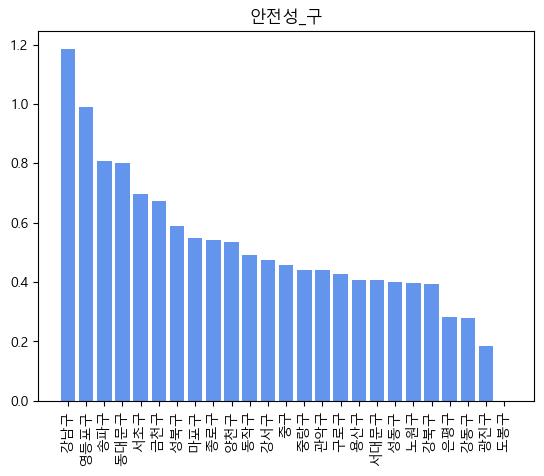

In [24]:
df = pd.read_csv('[221022]safety_gu.csv')#encoding='cp949')
df= df.sort_values(by = ['safety'],ascending = False)
plt.bar(df['Gu'],df['safety'], color = 'cornflowerblue')
plt.xticks(rotation=90)
plt.title("안전성_구")

### 1-3. KMO

In [ ]:
from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity
chi_square_value,p_value=calculate_bartlett_sphericity(d1.drop(['year','Gu'],axis = 1))
chi_square_value, p_value

(210.8684898912267, 1.3034373183609134e-36)

In [ ]:
from factor_analyzer.factor_analyzer import calculate_kmo

kmo_all,kmo_model=calculate_kmo(d1.drop(['year','Gu'],axis = 1))
kmo_model
#0.6미만으로 부적합..? 띠용

0.48733519693687005

## 2. 상업

### 2-1. 제외

In [45]:
d1 = pd.read_csv('data/서울시 우리마을가게 상권분석서비스(상권-상권변화지표).csv',encoding='cp949')
d1.head()

,기준_년_코드,기준_분기_코드,상권_구분_코드,상권_구분_코드_명,상권_코드,상권_코드_명,상권_변화_지표,상권_변화_지표_명,운영_영업_개월_평균,폐업_영업_개월_평균,서울_운영_영업_개월_평균,서울_폐업_영업_개월_평균
0,2021,4,U,관광특구,1001496,강남 마이스 관광특구,HH,정체,136,64,118,55
1,2021,4,U,관광특구,1001495,잠실 관광특구,LL,다이나믹,113,54,118,55
2,2021,4,U,관광특구,1001494,종로?청계 관광특구,HH,정체,158,74,118,55
3,2021,4,U,관광특구,1001493,동대문패션타운 관광특구,HH,정체,140,63,118,55
4,2021,4,U,관광특구,1001492,명동 남대문 북창동 다동 무교동 관광특구,HH,정체,163,65,118,55


In [48]:
d1['상권_코드_명'].nunique()

1668

* 상권코드명을 인터넷에 치면 행정동확인할 수 있음->그러나 1668개 하나하나 검색해서 찾아야하나..? 띠용..?

In [31]:
#d1이 더 좁은 지역 단위이므로 d2제외
d2 = pd.read_csv('data/서울시 우리마을가게 상권분석서비스(자치구별 상권변화지표).csv',encoding='cp949')
d2.head()

,기준_년_코드,기준_분기_코드,시군구_코드,시군구_코드_명,상권_변화_지표,상권_변화_지표_명,운영_영업_개월_평균,폐업_영업_개월_평균,서울_운영_영업_개월_평균,서울_폐업_영업_개월_평균
0,2022,2,11740,강동구,LL,다이나믹,114,52,121,55
1,2022,2,11710,송파구,LL,다이나믹,119,55,121,55
2,2022,2,11680,강남구,LL,다이나믹,113,51,121,55
3,2022,2,11650,서초구,HH,정체,131,56,121,55
4,2022,2,11620,관악구,LL,다이나믹,117,53,121,55


### 2-2. 상업_지표

In [40]:
d3_1 = pd.read_csv('data/B058. 서울시 행정동단위 분기별 추정매출액/2. 파일데이터/2018/TBDM_BLCK_SELNG_QU_2018_4분기.txt',delimiter = '|') 
d3_1.head()
#file = pd.read_csv('Boston_Housing.txt', delimiter = '\t')

,STDR_YY_CODE_SE,STDR_QU_CODE_SE,ADSTRD_CD,ADSTRD_NM,SVC_INDUTY_CODE_SE,SVC_INDUTY_CD_NM,AGE,SUM_SELNG_AMT,SUM_SELNG_CO
0,2018,4,11110515,청운효자동,CS100001,한식음식점,10,13107714,1153
1,2018,4,11110515,청운효자동,CS100001,한식음식점,20,410902277,21194
2,2018,4,11110515,청운효자동,CS100001,한식음식점,30,545410983,21967
3,2018,4,11110515,청운효자동,CS100001,한식음식점,40,612172305,21872
4,2018,4,11110515,청운효자동,CS100001,한식음식점,50,625827497,17200


In [36]:
d3_2 = pd.read_csv('data/B058. 서울시 행정동단위 분기별 추정매출액/2. 파일데이터/2019/TBDM_BLCK_SELNG_QU_2019_1분기.txt',delimiter = '|') 
d3_2.head(2)

,STDR_YY_CODE_SE,STDR_QU_CODE_SE,ADSTRD_CD,ADSTRD_NM,SVC_INDUTY_CODE_SE,SVC_INDUTY_CD_NM,AGE,SUM_SELNG_AMT,SUM_SELNG_CO
0,2019,1,11110515,청운효자동,CS100001,한식음식점,10,5966178,576
1,2019,1,11110515,청운효자동,CS100001,한식음식점,20,342132529,18063


In [37]:
d3_3 = pd.read_csv('data/B058. 서울시 행정동단위 분기별 추정매출액/2. 파일데이터/2019/TBDM_BLCK_SELNG_QU_2019_2분기.txt',delimiter = '|') 
d3_3.head(2)

,STDR_YY_CODE_SE,STDR_QU_CODE_SE,ADSTRD_CD,ADSTRD_NM,SVC_INDUTY_CODE_SE,SVC_INDUTY_CD_NM,AGE,SUM_SELNG_AMT,SUM_SELNG_CO
0,2019,2,11110515,청운효자동,CS100001,한식음식점,10,8537957,808
1,2019,2,11110515,청운효자동,CS100001,한식음식점,20,345844281,18582


In [38]:
d3_4 = pd.read_csv('data/B058. 서울시 행정동단위 분기별 추정매출액/2. 파일데이터/2019/TBDM_BLCK_SELNG_QU_2019_3분기.txt',delimiter = '|') 
d3_4.head(2)

,STDR_YY_CODE_SE,STDR_QU_CODE_SE,ADSTRD_CD,ADSTRD_NM,SVC_INDUTY_CODE_SE,SVC_INDUTY_CD_NM,AGE,SUM_SELNG_AMT,SUM_SELNG_CO
0,2019,3,11110515,청운효자동,CS100001,한식음식점,10,8316126,783
1,2019,3,11110515,청운효자동,CS100001,한식음식점,20,351619870,19697


* 기준년코드/분기/행정동코드/행정동명/서비스업종코드/서비스업종코드명/연령(10단위)/매출액_합계/매출건수_합계

In [41]:
#2018 4분기 ~2019 3분기 concat
d3 = pd.concat([d3_1, d3_2,d3_3,d3_4], axis = 0) 
d3.head()

,STDR_YY_CODE_SE,STDR_QU_CODE_SE,ADSTRD_CD,ADSTRD_NM,SVC_INDUTY_CODE_SE,SVC_INDUTY_CD_NM,AGE,SUM_SELNG_AMT,SUM_SELNG_CO
0,2018,4,11110515,청운효자동,CS100001,한식음식점,10,13107714,1153
1,2018,4,11110515,청운효자동,CS100001,한식음식점,20,410902277,21194
2,2018,4,11110515,청운효자동,CS100001,한식음식점,30,545410983,21967
3,2018,4,11110515,청운효자동,CS100001,한식음식점,40,612172305,21872
4,2018,4,11110515,청운효자동,CS100001,한식음식점,50,625827497,17200


In [52]:
df=d3.pivot_table(values = ['SUM_SELNG_AMT','SUM_SELNG_CO'],index = ['ADSTRD_NM'],aggfunc="sum")
df = df.reset_index()
df.head()

,ADSTRD_NM,SUM_SELNG_AMT,SUM_SELNG_CO
0,가락1동,250239049096,6632777
1,가락2동,233581351355,10922847
2,가락본동,295067067226,15633802
3,가리봉동,80613761036,5472862
4,가산동,779453179401,44222847


In [54]:
from sklearn.preprocessing import MinMaxScaler
min_max_scaler = MinMaxScaler()
fitted = min_max_scaler.fit(df.drop(['ADSTRD_NM'],axis = 1))
df_scale = min_max_scaler.transform(df.drop(['ADSTRD_NM'],axis = 1))
df_scale = pd.DataFrame(df_scale, columns=(df.drop(['ADSTRD_NM'],axis = 1)).columns, index=list(df.drop(['ADSTRD_NM'],axis = 1).index.values))
df_scale.head()

,SUM_SELNG_AMT,SUM_SELNG_CO
0,0.135054,0.065196
1,0.125953,0.108255
2,0.159545,0.155539
3,0.042382,0.053554
4,0.424181,0.442487


In [55]:
#상권발달지표: 합계매출액 * 0.3 + 합계매출건수 * 0.7
#매출액 가중치가 커지면 상권활발이랑 다르게 부자동네가 높아지지 않을까 싶어서 가중치 낮게
#하지만 중요한 지표이긴하니까 0.3정도..?
df_scale['commercial'] = df_scale['SUM_SELNG_AMT']*0.3 + df_scale['SUM_SELNG_CO']*0.7
df_commercial = pd.concat([df,df_scale['commercial']],axis=1)
df_commercial.head()

,ADSTRD_NM,SUM_SELNG_AMT,SUM_SELNG_CO,commercial
0,가락1동,250239049096,6632777,0.086153
1,가락2동,233581351355,10922847,0.113565
2,가락본동,295067067226,15633802,0.156741
3,가리봉동,80613761036,5472862,0.050202
4,가산동,779453179401,44222847,0.436995


In [56]:
df_commercial.to_csv('[221022]commercial_dong.csv')

In [57]:
df = pd.read_csv('[221022]commercial_dong.csv')#encoding='cp949')
df= df.sort_values(by = ['commercial'],ascending = False)
df.head()

,Unnamed: 0,ADSTRD_NM,SUM_SELNG_AMT,SUM_SELNG_CO,commercial
277,277,역삼1동,1833425623375,99768581,1.000000
187,187,서교동,1552236743714,82886279,0.835300
352,352,종로1.2.3.4가동,1154509818711,57305943,0.590388
108,108,명동,915298264096,52717213,0.518941
260,260,신촌동,738701341454,56207993,0.514523


In [53]:
#423개의 행정동
df['ADSTRD_NM'].nunique()

423